<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspect ratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage import feature

import os
import seaborn as sns
import cv2

In [2]:
data = pd.read_hdf("data.h5", "data")
print(len(data))
data.head()

1501


,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0.0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0


#### Display three of the learning set images.

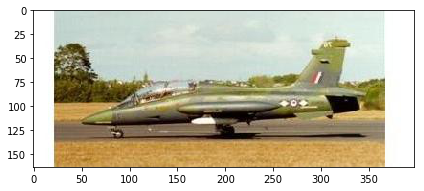

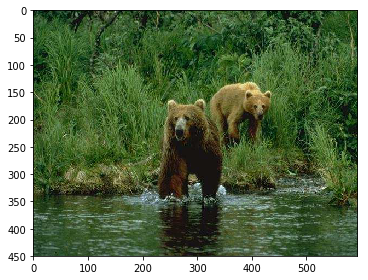

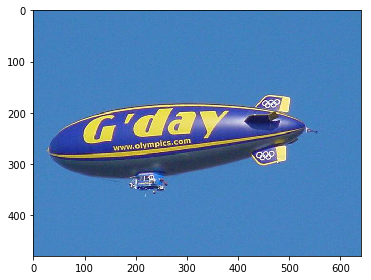

In [3]:
subsample = data.groupby('Encoding').agg(lambda x: x.iloc[0])
for i in range(3):
    skimage.io.imshow(subsample.iloc[i]['Pictures'])
    plt.show()

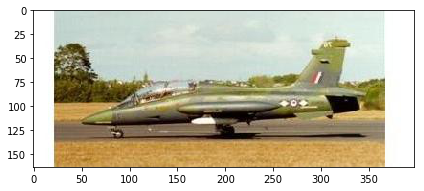

In [4]:
skimage.io.imshow(subsample.iloc[0]['Pictures'])

#### Provide graphical summaries of the sizes of the images, pixel intensities, and class frequencies.

<Figure size 432x288 with 0 Axes>

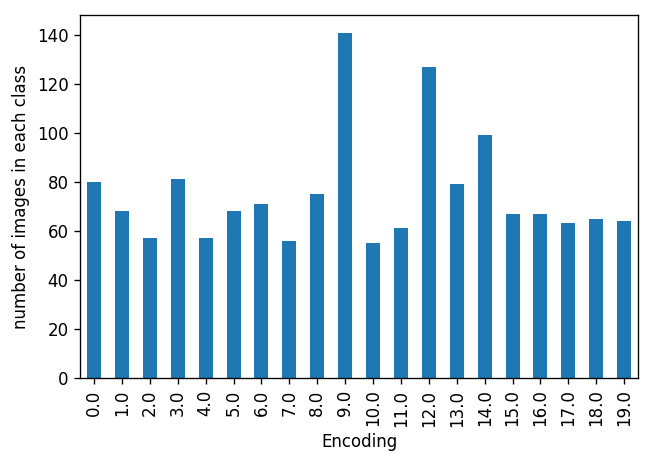

In [5]:
plt.clf()
plt.figure(figsize=(6,4), dpi=120)
# class frequency
class_frequency = data.groupby('Encoding').size()
class_frequency.plot.bar()
plt.ylabel("number of images in each class")

plt.show()
# plt.plot(class_frequency[0], class_frequency[1])

(0, 6)

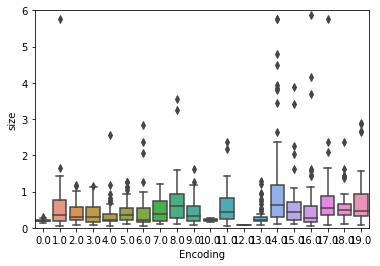

In [6]:
# plt.clf()
# plt.figure(figsize=(6,4), dpi=120)

# sizes of the images
def feature_size(image):
    """
    return image size
    """
    return image.size/1000000

data['size'] = data['Pictures'].apply(feature_size) 
sns.boxplot(x='Encoding', y='size', data=data)
plt.ylim((0,6))

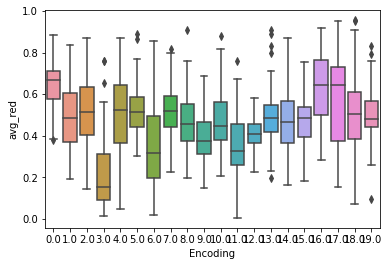

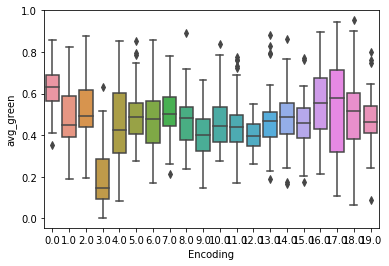

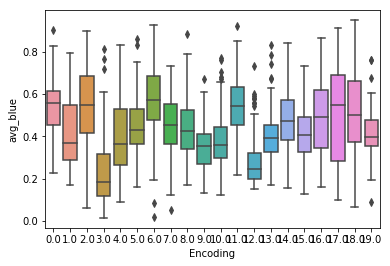

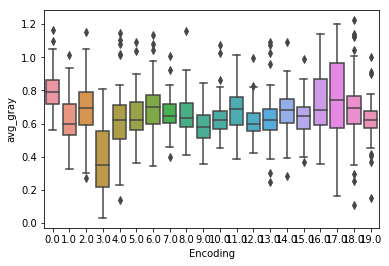

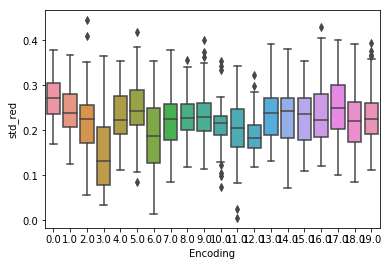

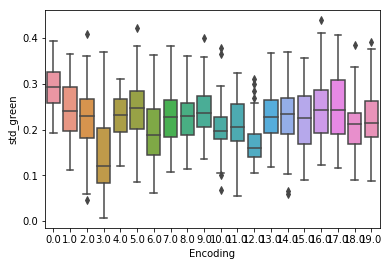

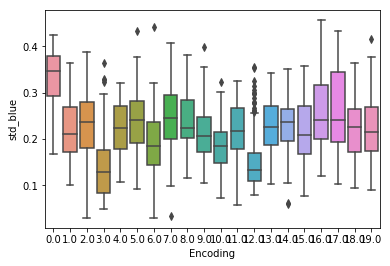

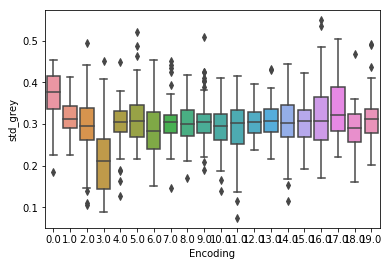

In [7]:
# pixel intensity
# plt.clf()
# plt.figure(figsize=(8,6), dpi=120)

def feature_avg_red(image):
    """
    return the average of the red-channel pictures for the image
    """
    return image[:,:,0].mean()/255

def feature_avg_green(image):
    """
    return the average of the green-channel pictures for the image
    """
    return image[:,:,1].mean()/255

def feature_avg_blue(image):
    """
    return the average of the blue-channel pictures for the image
    """
    return image[:,:,2].mean()/255
    
def feature_std_red(image):
    """
    return standard derivation of red channel
    """
    return image[:, :, 0].std()/255

def feature_std_green(image):
    """
    return standard derivation of green channel
    """
    return image[:, :, 1].std()/255

def feature_std_blue(image):
    """
    return standard derivation of blue channel
    """
    return image[:, :, 2].std()/255

def feature_avg_gray(image):
    """
    return mean value of grayscale
    """
    return np.mean(image[:, :, 0] + image[:, :, 1] + image[:, :, 2] / 3)/255

def feature_std_gray(image):
    """
    return mean value of grayscale
    """
    return np.std(image[:, :, 0] + image[:, :, 1] + image[:, :, 2] / 3)/255

data['avg_red'] = data['Pictures'].apply(feature_avg_red) 
data['avg_green'] = data['Pictures'].apply(feature_avg_green) 
data['avg_blue'] = data['Pictures'].apply(feature_avg_blue) 
data['avg_gray'] = data['Pictures'].apply(feature_avg_gray) 

data['std_red'] = data['Pictures'].apply(feature_std_red) 
data['std_green'] = data['Pictures'].apply(feature_std_green) 
data['std_blue'] = data['Pictures'].apply(feature_std_blue) 
data['std_grey'] = data['Pictures'].apply(feature_std_gray) 


sns.boxplot(x='Encoding', y='avg_red', data=data)
plt.show()
sns.boxplot(x='Encoding', y='avg_green', data=data)
plt.show()
sns.boxplot(x='Encoding', y='avg_blue', data=data)
plt.show()
sns.boxplot(x='Encoding', y='avg_gray', data=data)
plt.show()

sns.boxplot(x='Encoding', y='std_red', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_green', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_blue', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_grey', data=data)
plt.show()

# plt.ylim((0,8e5))

#### Provide functions that summarize pixel intensity data (e.g.,https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html#py-table-of-content-feature2d). Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspect ratio.

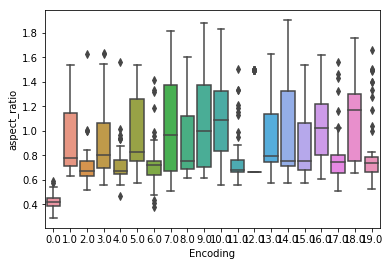

In [9]:
def feature_aspect_ratio(image):
    """
    return aspect ratio of the image, 
    i.e., the height divided by the width of the image
    """
    return image.shape[0] / image.shape[1]

data['aspect_ratio'] = data['Pictures'].apply(feature_aspect_ratio) 

sns.boxplot(x='Encoding', y='aspect_ratio', data=data)
plt.show()

####  Test the feature of amount of corners detected by Harris corner detector

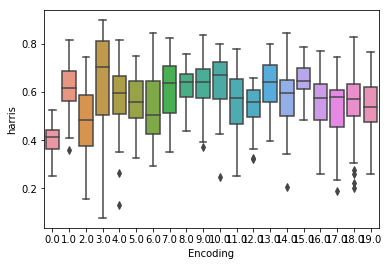

In [10]:

def short_side_resize(image, length=256):
    """
    resize the image to a fixed short side length
    """
    height, width, _ = image.shape
    if height < width:
        ratio = length / height
    else:
        ratio = length / width
    new_height = int(height * ratio)
    new_width = int(width * ratio)
    return skimage.transform.resize(image, (new_height, new_width), mode='reflect', anti_aliasing=True)

def center_crop(image, length=224):
    """
    crop the center patch of the image with length * length
    """
    height, width, _ = image.shape
    cx, cy = height // 2, width // 2
    lx, ly = cx - length//2, cy - length//2
    hx, hy = length + lx, length + ly
    return image[lx:hx, ly:hy, :]

def feature_harris(image):
    """
    return amount of corners detected by Harris corner detector
    """
    image = center_crop(short_side_resize(image))
    gray = skimage.color.rgb2gray(image)
    gray = np.array(gray * 255, dtype=np.uint8)
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = np.where(harris > 0)
    return len(harris_corners[0]) / harris.size

data['harris'] = data['Pictures'].apply(feature_harris) 

sns.boxplot(x='Encoding', y='harris', data=data)
plt.show()

####  Test the dog feature feature

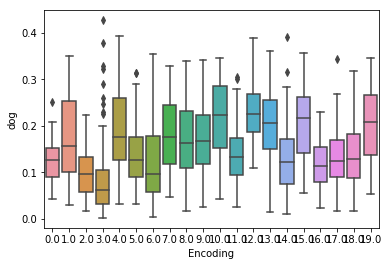

In [11]:
def feature_dog(image):
    """
    return the differences of images processed by two Gaussian 
    filters with different variance (we choose 0.3 and 0.5)
    """
#     image = cv2.resize(image, (64, 64), cv2.INTER_LINEAR)
    gray = skimage.color.rgb2gray(image)
    g3 = np.asarray(skimage.filters.gaussian(gray, sigma=0.3))
    g5 = np.asarray(skimage.filters.gaussian(gray, sigma=0.5))
    dog = g3-g5
    return sum(sum(dog > 0.05 *dog.max() ))/dog.size

data['dog'] = data['Pictures'].apply(feature_dog) 

sns.boxplot(x='Encoding', y='dog', data=data)
plt.show()

####  Test the feature of luminance, blue chroma and red chroma components

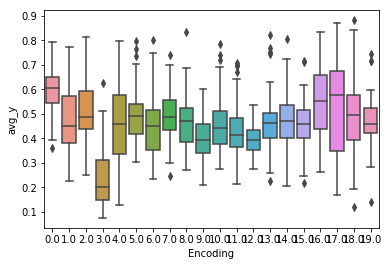

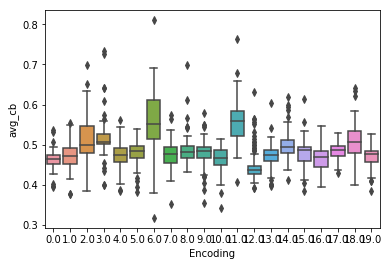

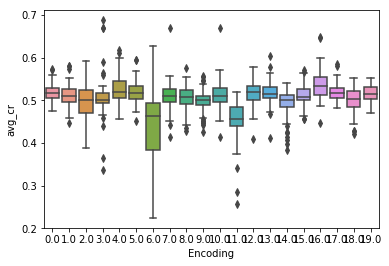

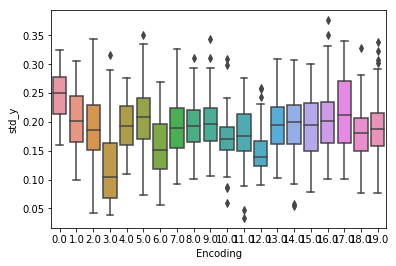

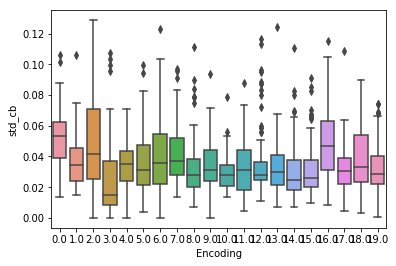

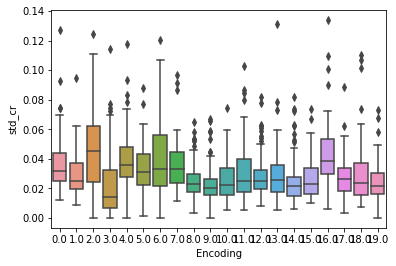

In [12]:
def feature_avg_y(image):
    """
    return mean value of luminance Y
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 0].mean()/255


def feature_avg_cb(image):
    """
    return mean value of blue chroma component (Cb)
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 1].mean()/255

def feature_avg_cr(image):
    """
    return mean value of red chroma component (Cr)
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 2].mean()/255

def feature_std_y(image):
    """
    return standard derivation of luminance (Y)
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 0].std()/255

def feature_std_cb(image):
    """
    return standard derivation of blue chroma component (Cb)
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 1].std()/255

def feature_std_cr(image):
    """
    return standard derivation of red chroma component (Cr)
    """
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 2].std()/255


data['avg_y'] = data['Pictures'].apply(feature_avg_y) 
data['avg_cb'] = data['Pictures'].apply(feature_avg_cb) 
data['avg_cr'] = data['Pictures'].apply(feature_avg_cr) 
data['std_y'] = data['Pictures'].apply(feature_std_y) 
data['std_cb'] = data['Pictures'].apply(feature_std_cb) 
data['std_cr'] = data['Pictures'].apply(feature_std_cr) 


sns.boxplot(x='Encoding', y='avg_y', data=data)
plt.show()
sns.boxplot(x='Encoding', y='avg_cb', data=data)
plt.show()
sns.boxplot(x='Encoding', y='avg_cr', data=data)
plt.show()

sns.boxplot(x='Encoding', y='std_y', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_cb', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_cr', data=data)
plt.show()

####  Test the feature of Histogram of Oriented Gradients (HOG)

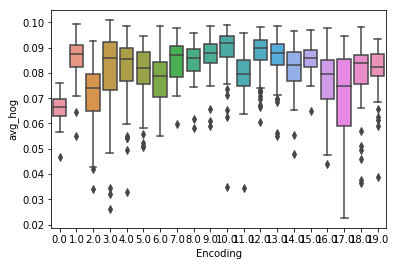

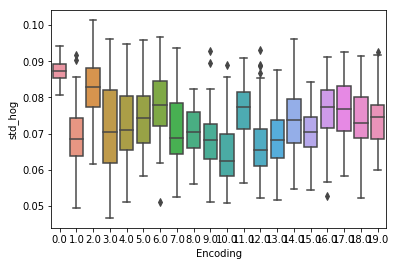

In [13]:

def feature_avg_hog(image):
    """
    return mean value of Histogram of Oriented Gradients (HOG)
    """
    return skimage.feature.hog(image).mean()

def feature_std_hog(image):
    """
    return standard derivation of Histogram of Oriented Gradients (HOG)
    """
    return skimage.feature.hog(image).std()

data['avg_hog'] = data['Pictures'].apply(feature_avg_hog) 
data['std_hog'] = data['Pictures'].apply(feature_std_hog) 

sns.boxplot(x='Encoding', y='avg_hog', data=data)
plt.show()
sns.boxplot(x='Encoding', y='std_hog', data=data)
plt.show()

In [14]:
import cv2

# def resize(image):
#     """
#     return the resized image
#     """
#     image = cv2.resize(image, (32, 32), cv2.INTER_LINEAR)
#     return image

# data['resized_Pictures'] = data['Pictures'].apply(resize) 
# # data.head()
# # skimage.io.imshow(data.iloc[410]['resized_Pictures'])
# # plt.show()
# resized_pictures = np.array(data['resized_Pictures'].values)
# print(resized_pictures)

def load_data(df, img_w, img_h, picture='Pictures'):
    print('Reading training images')
    img_list, label_list = [], []
    for index, data in df.iterrows():
        img = data[picture]
        label = data['Encoding']
        #resize each image to the standard img_w * img_h 
        img = cv2.resize(img, (img_w, img_h), cv2.INTER_LINEAR)
        img_list.append(img), label_list.append(label)
    img_list, label_list = np.array(img_list, dtype=np.uint8), np.array( label_list, dtype=np.int32 )
    img_list = img_list.astype('float32')
    label_list = label_list.astype('long')
    img_list = img_list / 255
    return img_list, label_list

resized_pictures, label = load_data(data, 32, 32)
print(resized_pictures.shape, label.shape)

resized_pictures = resized_pictures.reshape(-1, 32*32*3)
resized_pictures = resized_pictures / resized_pictures.shape[0]
print(resized_pictures.shape, label.shape)
mean_pictures = np.mean(resized_pictures,axis=0)

resized_pictures = resized_pictures - mean_pictures

u, s, vh = np.linalg.svd(resized_pictures)
print(s)

# sns.boxplot(x='Encoding', y='harris', data=data)
# plt.show()

Reading training images
(1501, 32, 32, 3) (1501,)
(1501, 3072) (1501,)
[2.3578906e-01 1.0723010e-01 9.5755063e-02 ... 1.4097234e-05 2.3767907e-07
 2.3420943e-18]


In [15]:
print(vh[:100,:].shape)


(100, 3072)


In [16]:
def feature_svd(image):
    """
    return standard derivation of Histogram of Oriented Gradients (HOG)
    """
    resized_image = cv2.resize(image, (32, 32), cv2.INTER_LINEAR) / 255
    normalized_image = resized_image.reshape(32*32*3) - mean_pictures
    eigenvalues = vh[:100,:]@normalized_image / np.linalg.norm(normalized_image)
    return eigenvalues

data['svd'] = data['Pictures'].apply(feature_svd) 

# sns.boxplot(x='Encoding', y='svd', data=data)
# plt.show()


In [17]:

def feature_canny(image):
    """
    return amount of corners detected by Harris corner detector
    """
    image = cv2.resize(image, (128, 128), cv2.INTER_LINEAR) / 255
    gray = skimage.color.rgb2gray(image)
    gray = np.array(gray * 255, dtype=np.uint8)
    canny = cv2.Canny(gray, 100, 200)/255
    canny = np.array(canny).flatten()
    return canny # len(harris_corners[0]) / harris.size

data['canny'] = data['Pictures'].apply(feature_canny) 

print(data.iloc[410]['canny'].shape)

# sns.boxplot(x='Encoding', y='harris', data=data)
# plt.show()

(16384,)


In [18]:
canny_set, label = load_data(data, 64, 64, 'canny')

resized_canny = canny_set.reshape(-1, 64*64)

mean_canny = np.mean(resized_canny,axis=0)

resized_canny = resized_canny - mean_canny

u_canny, s_canny, vh_canny = np.linalg.svd(resized_canny)
print(vh_canny.shape)

Reading training images
(4096, 4096)


In [19]:
def feature_canny_svd(image):
    """
    return standard derivation of Histogram of Oriented Gradients (HOG)
    """
    resized_image = cv2.resize(image, (64, 64), cv2.INTER_LINEAR) / 255
    normalized_image = resized_image.reshape(64*64) - mean_canny
    eigenvalues = vh_canny[:10,:]@normalized_image # / np.linalg.norm(normalized_image)
    return eigenvalues

data['canny_svd'] = data['canny'].apply(feature_canny_svd) 

# sns.boxplot(x='Encoding', y='canny_svd', data=data)
# plt.show()

 We expect all external sources sited, and significant indication of EDA. 

In [20]:
data.to_hdf("feature.h5", "data", mode="w")
data.head()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:2378: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Pictures', 'svd', 'canny', 'canny_svd']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,Pictures,Encoding,size,avg_red,avg_green,avg_blue,avg_gray,std_red,std_green,std_blue,...,avg_cb,avg_cr,std_y,std_cb,std_cr,avg_hog,std_hog,svd,canny,canny_svd
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0,0.195816,0.719042,0.693139,0.584908,0.794578,0.221203,0.251137,0.312346,...,0.450585,0.521069,0.209788,0.057982,0.042520,0.069350,0.086811,"[-0.9411725618842666, 0.008966214811940402, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.006201030396643063, 0.0003885448107720387,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0,0.221352,0.826431,0.742275,0.646295,0.920591,0.216836,0.292104,0.276149,...,0.447331,0.545779,0.222930,0.024625,0.069641,0.074722,0.082233,"[-0.9452094848143205, -0.1284002312458272, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.006201030396643063, 0.0003885448107720387,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0,0.194535,0.667152,0.579563,0.438250,0.696626,0.252515,0.267002,0.352605,...,0.426911,0.550525,0.219960,0.101463,0.074436,0.068713,0.085799,"[-0.9194251189689553, -0.04598015488281377, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.006201030396643063, 0.0003885448107720387,..."
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0.0,0.200430,0.596705,0.520189,0.305558,0.672473,0.253041,0.246156,0.327109,...,0.396350,0.550898,0.210079,0.088122,0.061079,0.074841,0.080767,"[-0.8658767978779213, 0.005307098609816353, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.011034498091142122, 0.012793216648073858, -..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0.0,0.208560,0.578031,0.590215,0.338247,0.624215,0.289629,0.279945,0.370162,...,0.393098,0.514607,0.243142,0.105869,0.027735,0.069497,0.086694,"[-0.887418659157311, 0.015802314068069624, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.006201030396643063, 0.0003885448107720387,..."


<h4> Graphs </h4>

In [22]:
# def feature_frame(df):
#     # add all features to a DataFrame and drop `Picture` column
# #     df["size"] = df["Pictures"].apply(feature_size)
# #     df["avg_red"] = df["Pictures"].apply(feature_avg_red)
# #     df["avg_green"] = df["Pictures"].apply(feature_avg_green)
# #     df["avg_blue"] = df["Pictures"].apply(feature_avg_blue)
# #     df["aspect_ratio"] = df["Pictures"].apply(feature_aspect_ratio)
#     df["harris"] = df["Pictures"].apply(feature_harris)
# #     df["dog"] = df["Pictures"].apply(feature_dog)
# #     df["avg_y"] = df["Pictures"].apply(feature_avg_y)
# #     df["avg_cb"] = df["Pictures"].apply(feature_avg_cb)
# #     df["avg_cr"] = df["Pictures"].apply(feature_avg_cr)
# #     df["std_y"] = df["Pictures"].apply(feature_std_y)
# #     df["std_cb"] = df["Pictures"].apply(feature_std_cb)
# #     df["std_cr"] = df["Pictures"].apply(feature_std_cr)
# #     df["avg_hog"] = df["Pictures"].apply(feature_avg_hog)
# #     df["std_hog"] = df["Pictures"].apply(feature_std_hog)
#     del df["Pictures"]
#     return df

In [23]:
# feature_df = feature_frame(data)


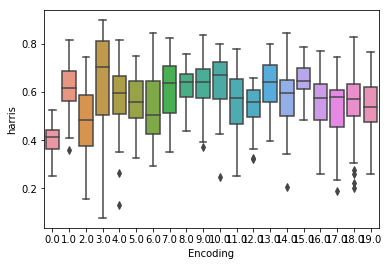

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [ ]:
# def feature_frame(df):
#     return df
#     #Returns data-frame with all the features now inside, and calculated


In [ ]:
# feature_frame(data_from_nb1)

#### Examine how these image features vary between classes.